In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#loading data set
df=pd.read_csv('/content/bankruptcy-prevention-new.csv')

### **EDA**

In [4]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [5]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [6]:
df.shape

(250, 7)

In [7]:
df.size

1750

In [8]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [9]:
df.ndim

2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [11]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.isnull()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()
# no null values

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [15]:
df.duplicated().sum()

147

In [16]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(103, 7)

### **data pre-processing**

In [19]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [20]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [21]:
df['class'].value_counts()

non-bankruptcy    78
bankruptcy        25
Name: class, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
le.fit(df['class'])

LabelEncoder()

In [25]:
df['class'] = le.transform(df['class'])

In [26]:
df['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [27]:
df['class'].value_counts()

1    78
0    25
Name: class, dtype: int64

In [28]:
# 0--bankruptcy
# 1--non-bankruptcy

df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


### **Visualization**

<Axes: >

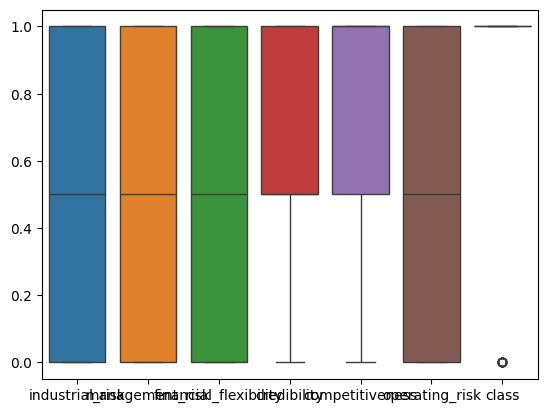

In [29]:
sns.boxplot(df)
# no outliers

<Axes: >

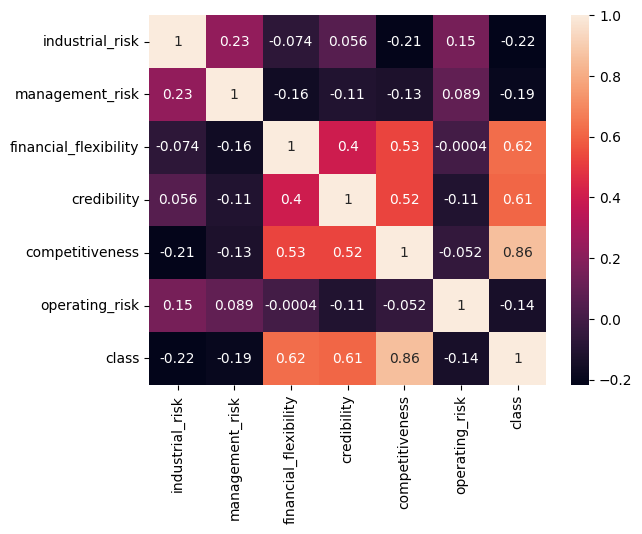

In [30]:
sns.heatmap(df.corr(),annot=True)


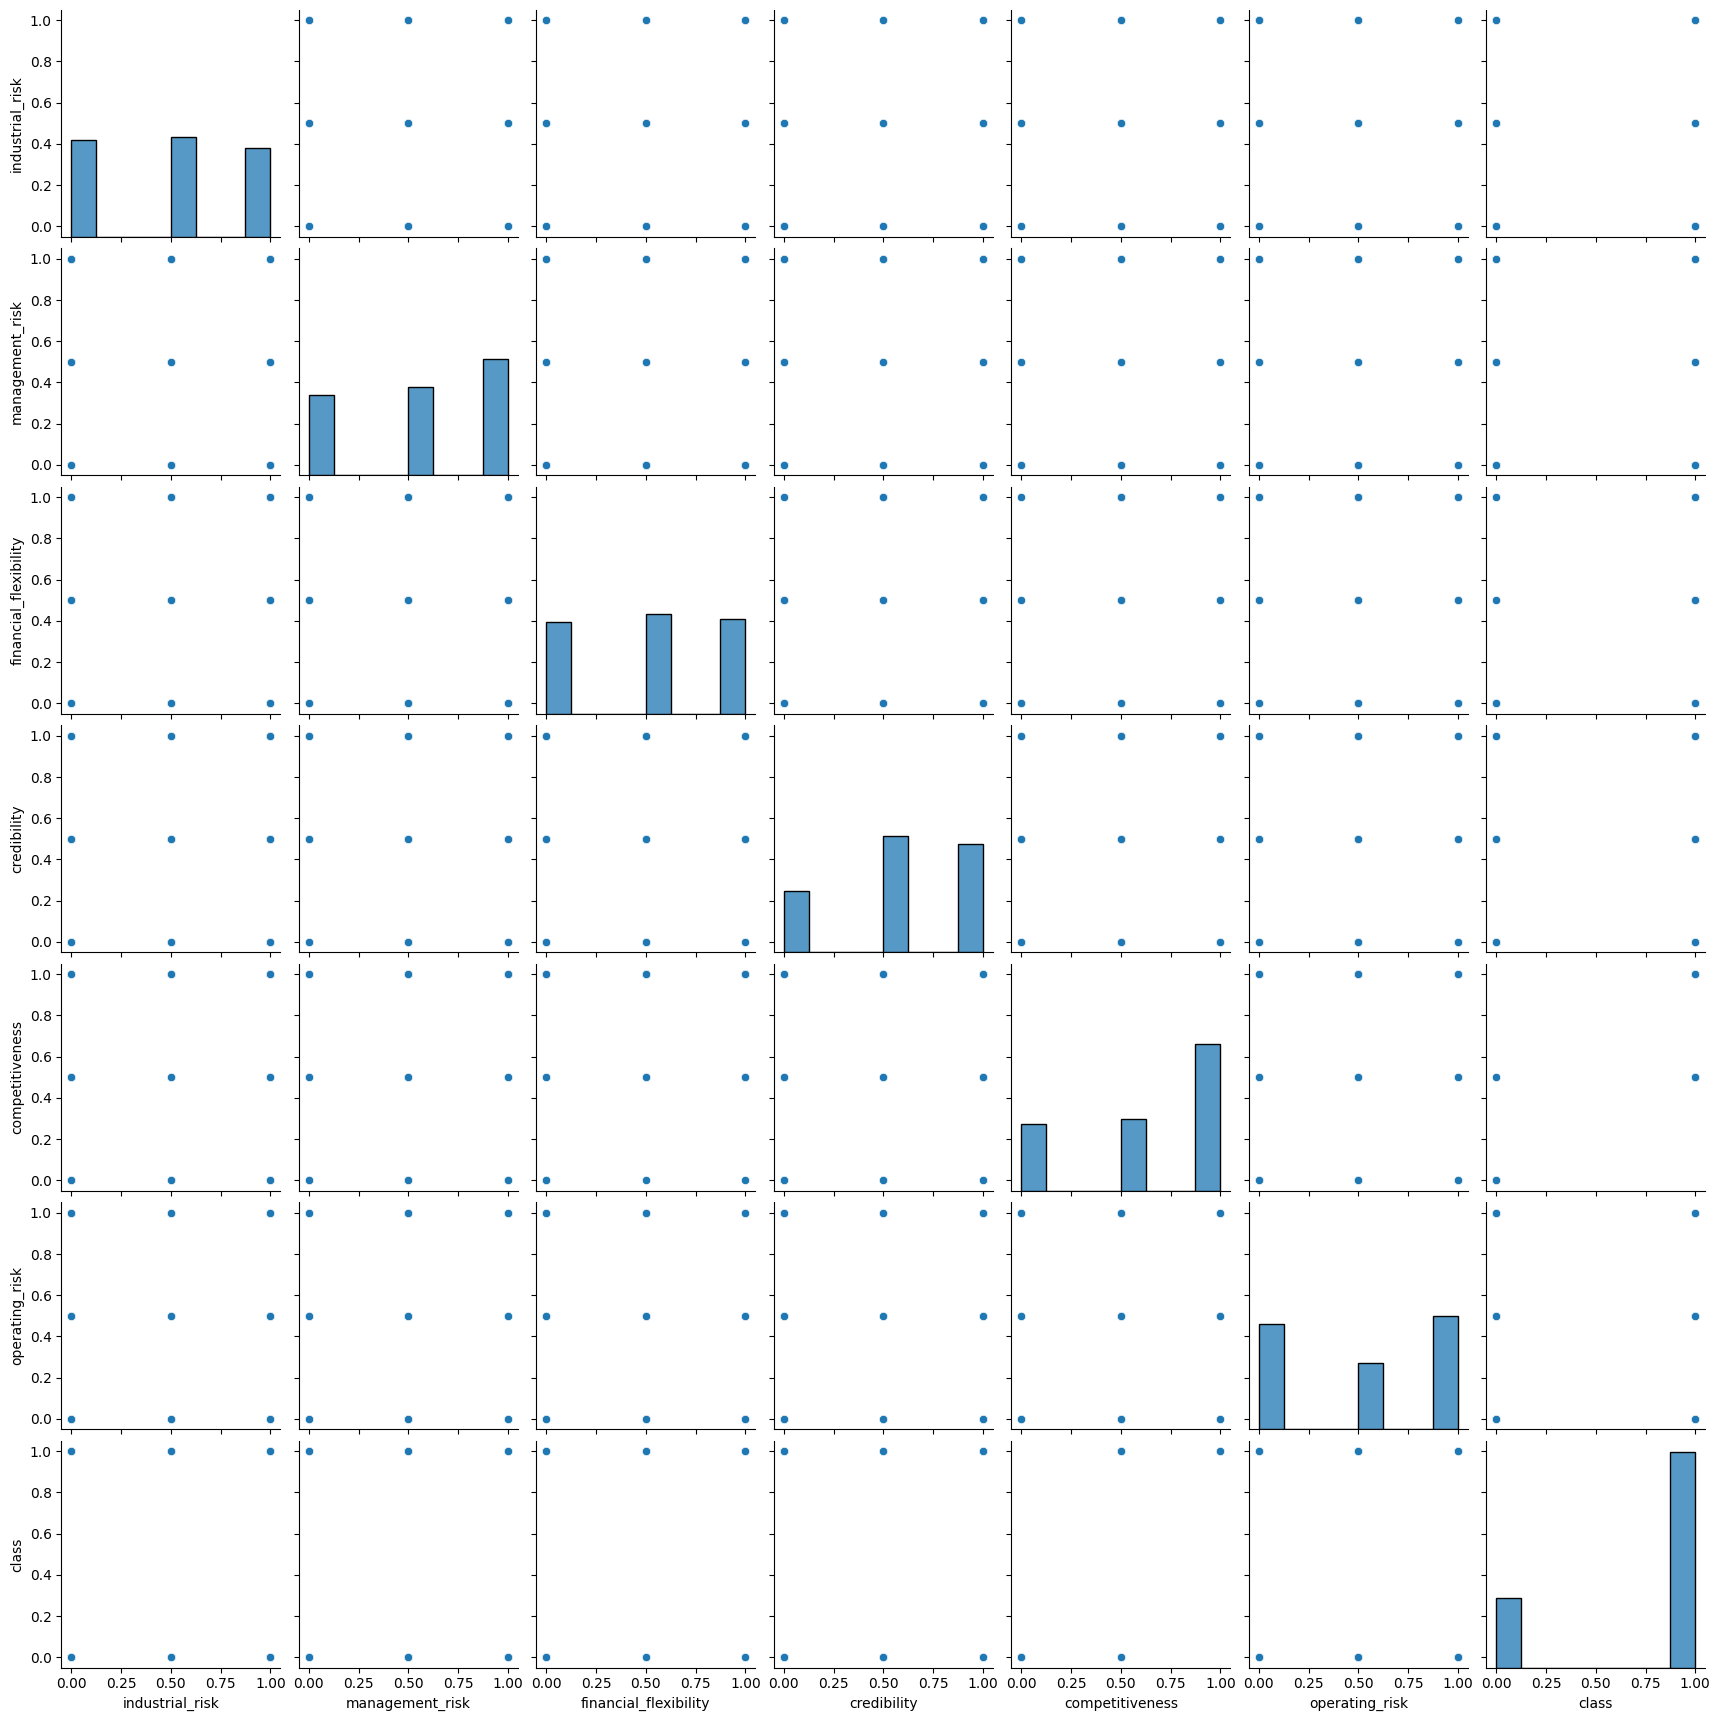

In [31]:
sns.pairplot(df)

In [32]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

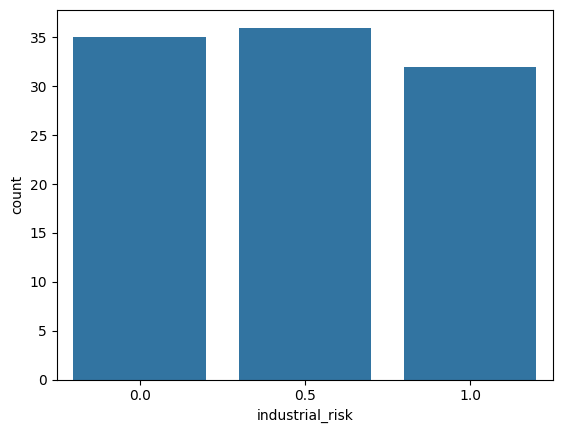

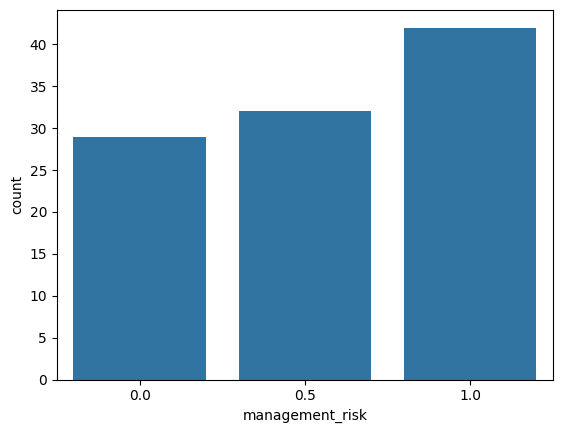

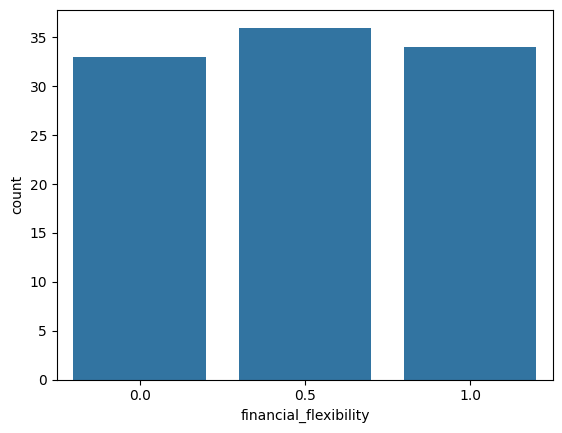

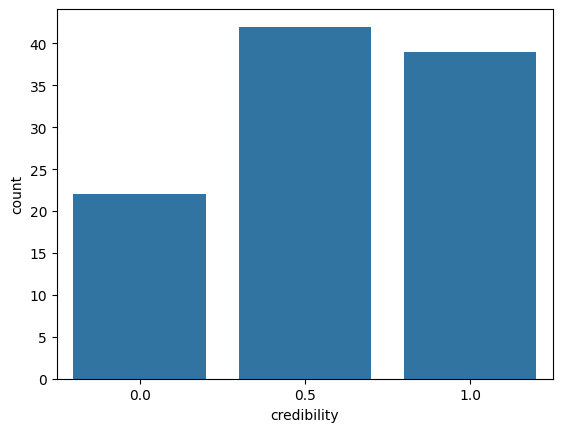

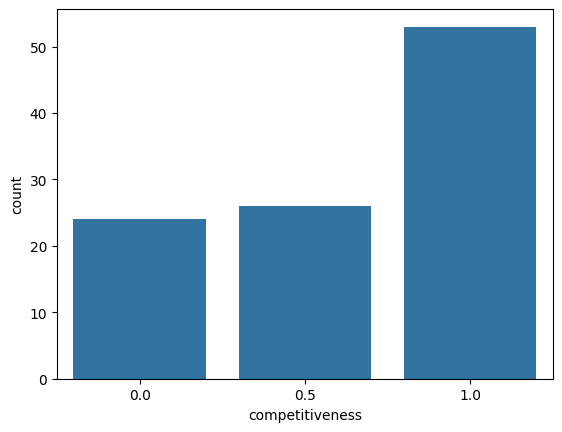

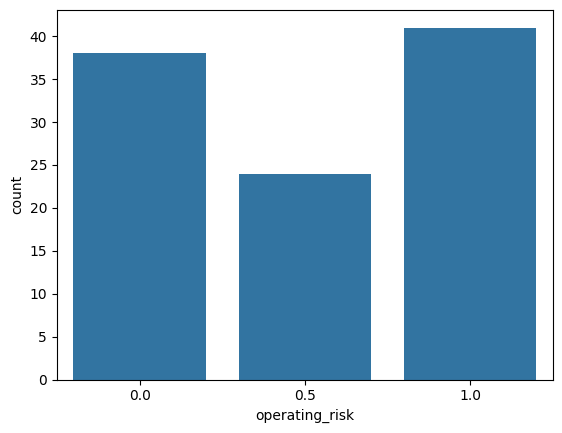

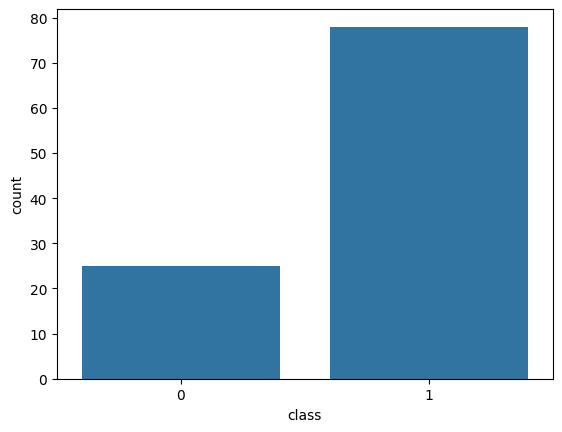

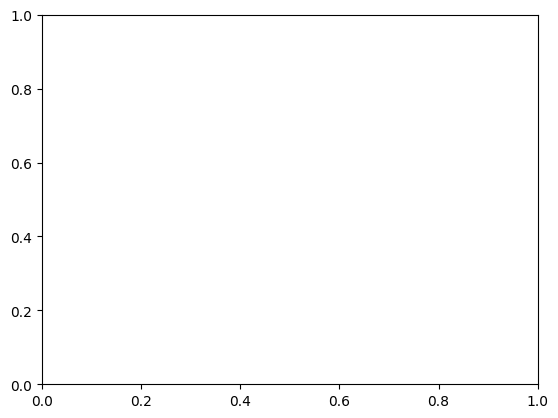

In [33]:
sns.countplot(data=df , x='industrial_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df , x='management_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df , x='financial_flexibility' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df , x='credibility' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df , x='competitiveness' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df , x='operating_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df , x='class' )
fig, ax = plt.subplots(nrows=1, ncols=1)

In [34]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

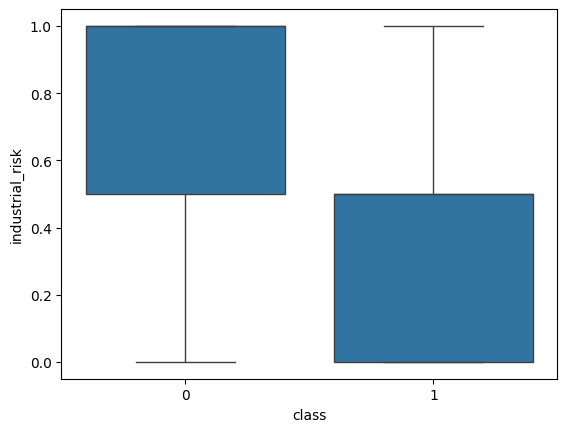

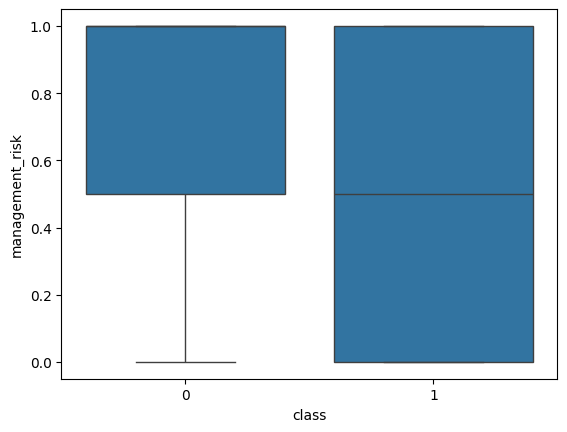

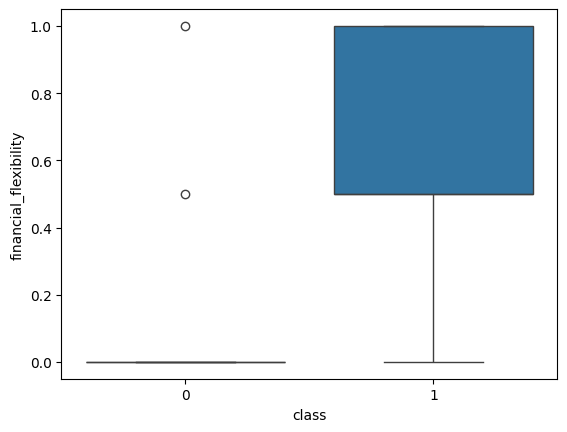

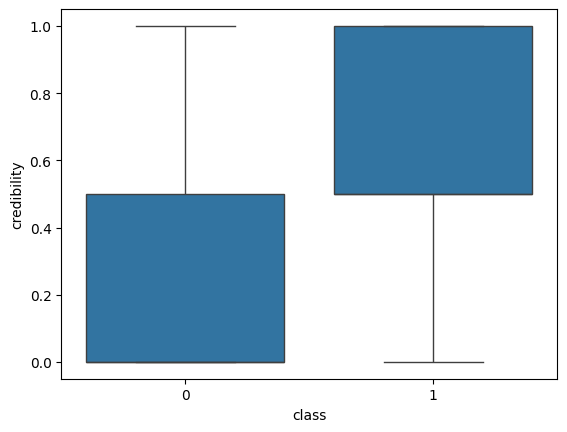

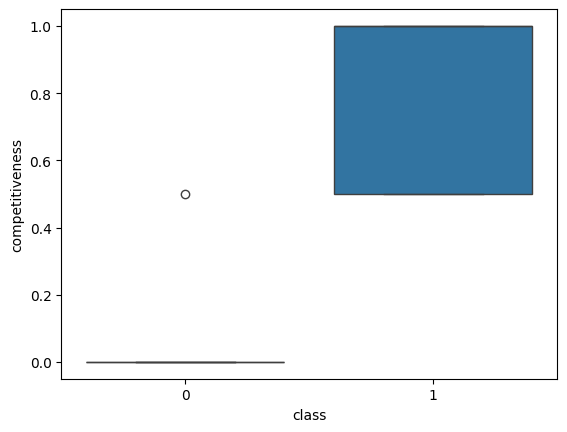

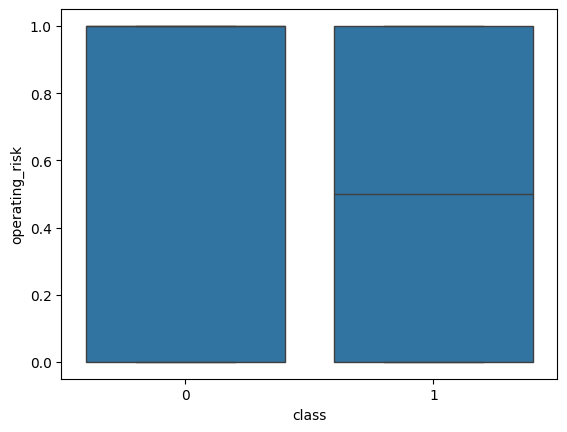

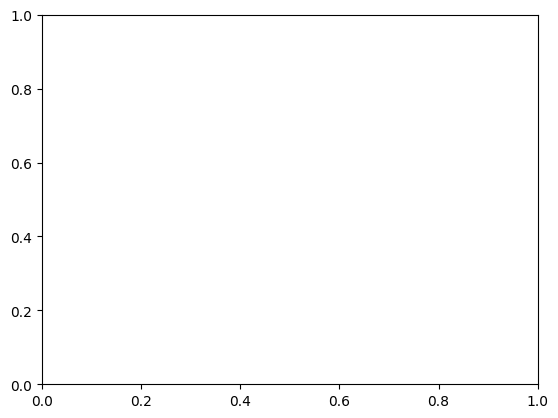

In [35]:
sns.boxplot(data=df , x='class' , y='industrial_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(data=df , x='class' , y='management_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(data=df , x='class' , y='financial_flexibility' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(data=df , x='class' , y='credibility' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(data=df , x='class' , y='competitiveness' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(data=df , x='class' , y='operating_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

In [36]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

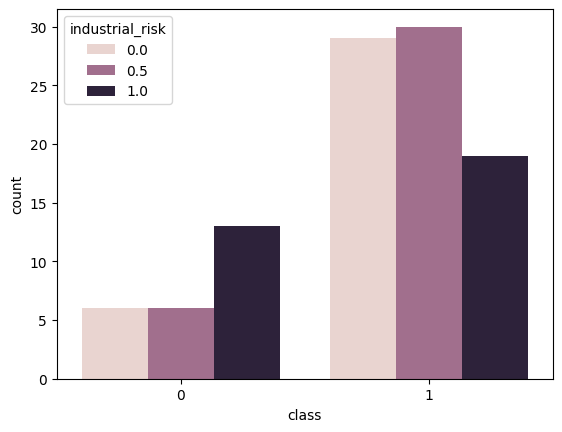

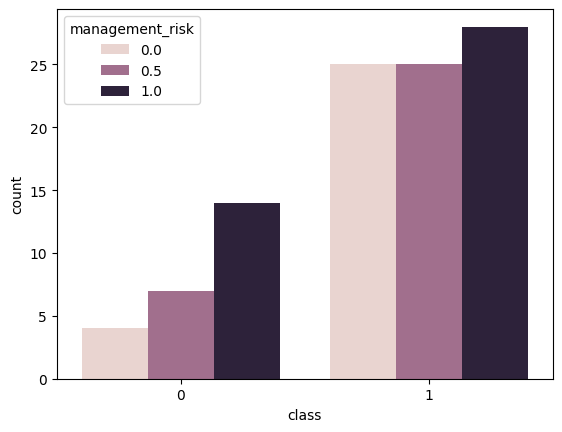

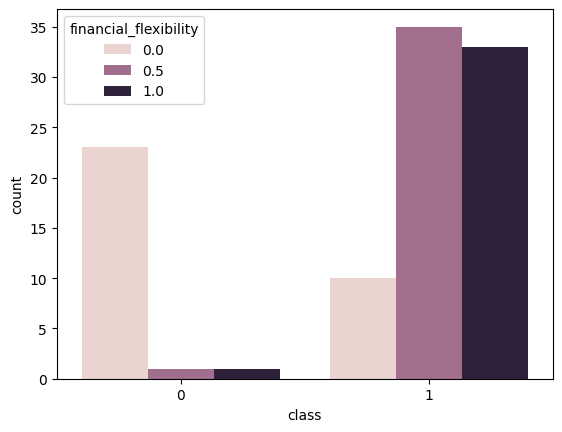

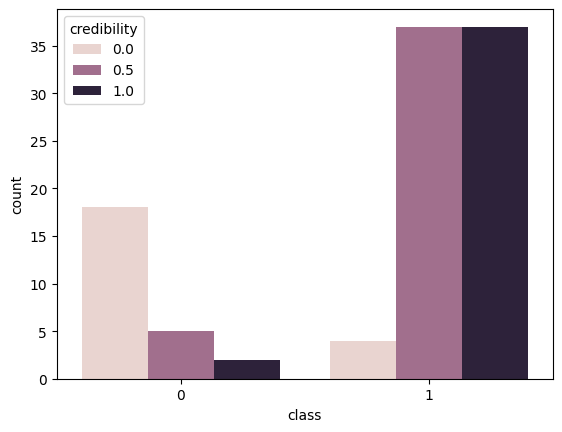

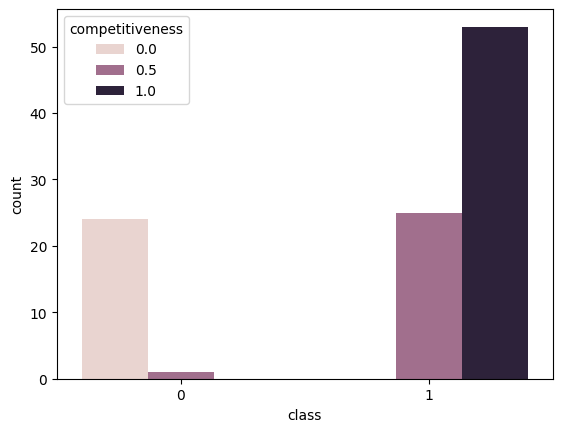

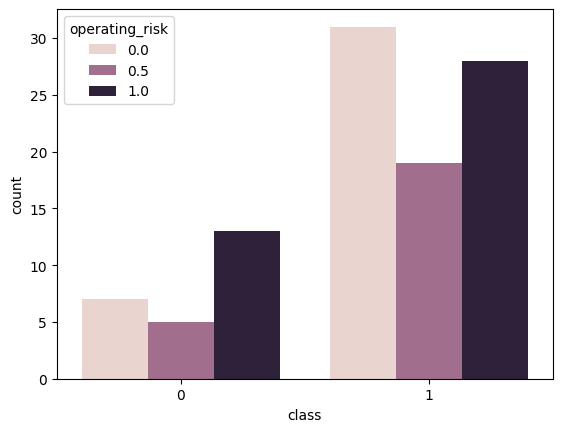

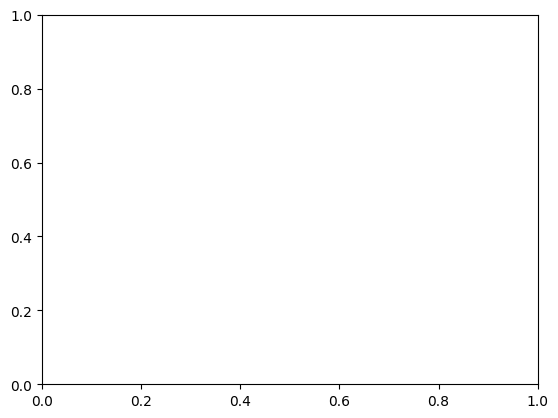

In [37]:
sns.countplot(data=df,x='class' , hue='industrial_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)


sns.countplot(data=df,x='class' , hue='management_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df,x='class' , hue='financial_flexibility' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df,x='class' , hue='credibility' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df,x='class' , hue='competitiveness' )
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.countplot(data=df,x='class' , hue='operating_risk' )
fig, ax = plt.subplots(nrows=1, ncols=1)

In [38]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

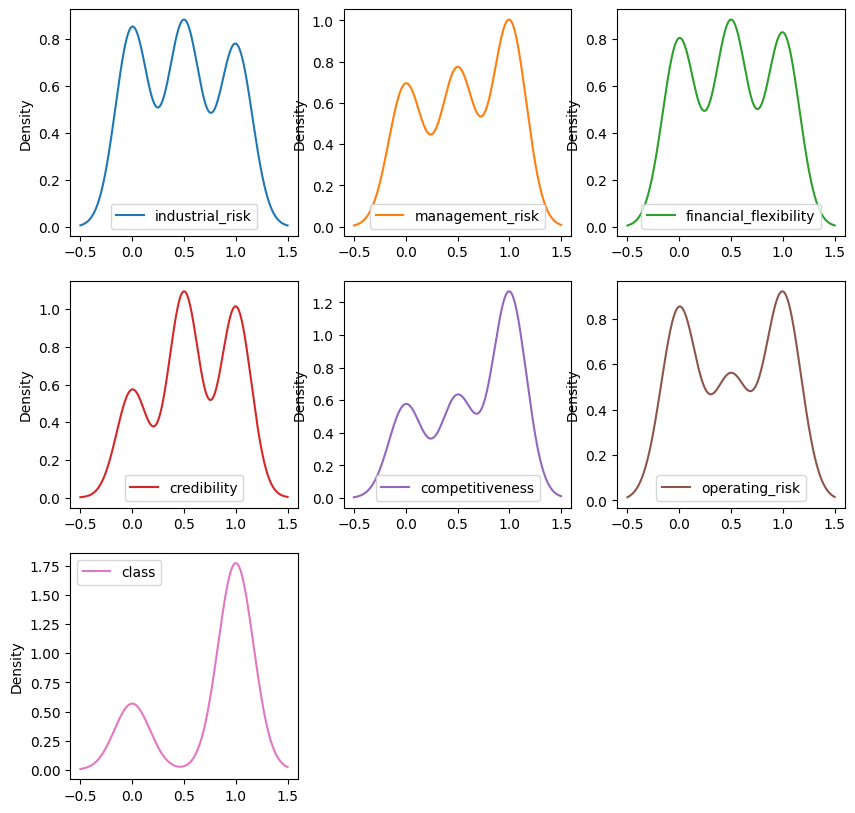

In [39]:

data = df
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize=(10,10))
plt.show()

<Axes: ylabel='Density'>

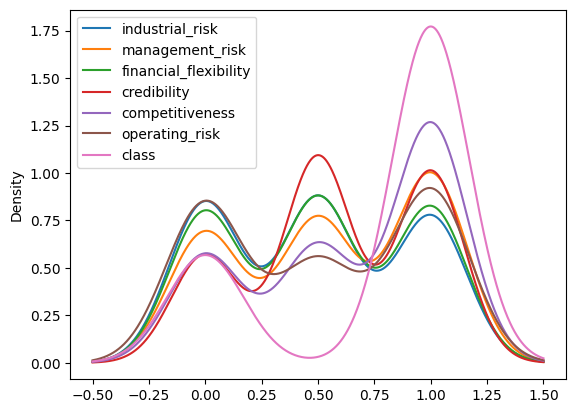

In [40]:
df.plot(kind='density')

In [41]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

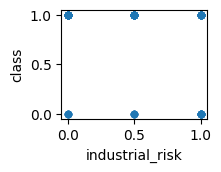

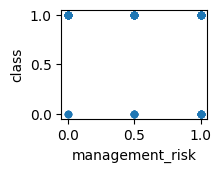

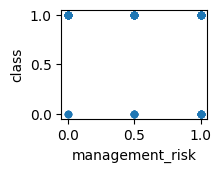

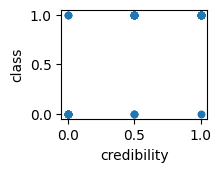

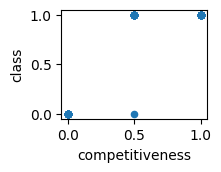

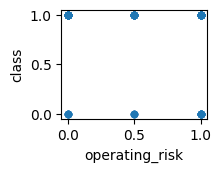

In [42]:
data.plot(kind='scatter', x='industrial_risk', y='class', subplots=True, layout=(3,3), sharex=False)
plt.show()

data.plot(kind='scatter', x='management_risk', y='class', subplots=True, layout=(3,3), sharex=False)
plt.show()

data.plot(kind='scatter', x='management_risk', y='class', subplots=True, layout=(3,3), sharex=False)
plt.show()

data.plot(kind='scatter', x='credibility', y='class', subplots=True, layout=(3,3), sharex=False)
plt.show()

data.plot(kind='scatter', x='competitiveness', y='class', subplots=True, layout=(3,3), sharex=False)
plt.show()

data.plot(kind='scatter', x='operating_risk', y='class', subplots=True, layout=(3,3), sharex=False)
plt.show()

### **MODEL BUILDING**

**Splitting the features and target**

In [43]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [44]:
# y-target
y = df.iloc[ : , 6:8 ]

In [45]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [46]:
# x-features
x = df.iloc[ : , 0:6 ]

In [47]:
x.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=45)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 6)
(31, 6)
(72, 1)
(31, 1)


### **LogisticRegression**

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
lr_pred = lr.predict( x_test )

In [54]:
print(accuracy_score(y_test,lr_pred))

print(confusion_matrix(y_test,lr_pred))

print(classification_report(y_test,lr_pred))

1.0
[[12  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



#roc curve

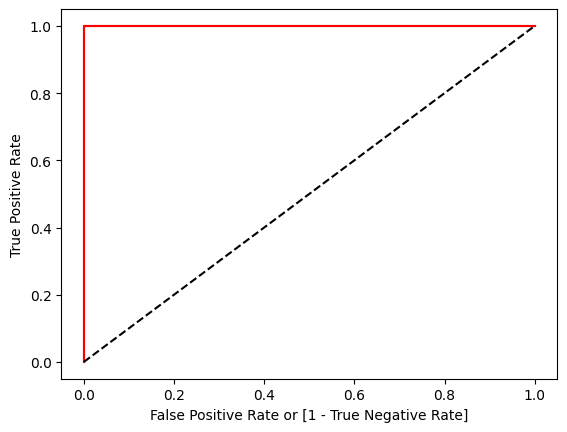

auc accuracy: 1.0


In [55]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, _ = metrics.roc_curve(y_test, lr_pred)
plt.plot(fpr,tpr,color='red')
auc=accuracy_score(y_test,lr_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

### **KNN**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
knn_pred = knn.predict ( x_test )

In [59]:
print(accuracy_score(y_test,knn_pred))

print(confusion_matrix(y_test,knn_pred))

print(classification_report(y_test,knn_pred))

0.967741935483871
[[11  1]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.95      1.00      0.97        19

    accuracy                           0.97        31
   macro avg       0.97      0.96      0.97        31
weighted avg       0.97      0.97      0.97        31



# GridSearch

In [60]:
params = { 'n_neighbors' : [1,2,3,4,5] }

In [61]:
from sklearn.model_selection import GridSearchCV


gs = GridSearchCV( knn, params, verbose=2)

In [62]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, verbose=2)

In [63]:
gs.best_params_

{'n_neighbors': 1}

### **roc curve**

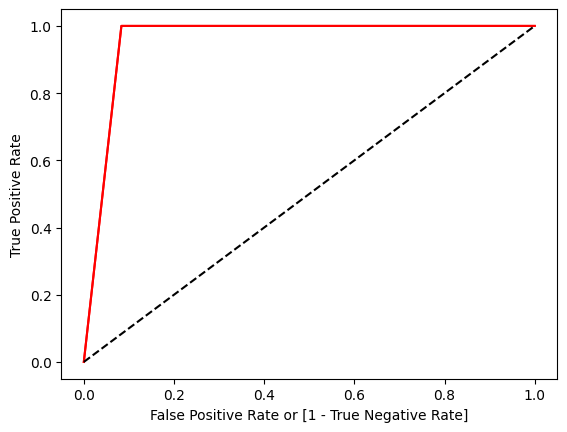

auc accuracy: 0.967741935483871


In [64]:
 # ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, _ = metrics.roc_curve(y_test, knn_pred)
plt.plot(fpr,tpr,color='red')
auc=accuracy_score(y_test,knn_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

### **DT**

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( criterion = 'gini' , splitter = 'best', max_depth = 2)


In [66]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [67]:
dt_pred = dt.predict ( x_test )

In [68]:
print(accuracy_score(y_test,dt_pred))

print(confusion_matrix(y_test,dt_pred))

print(classification_report(y_test,dt_pred))

1.0
[[12  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



#GridSearch

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
params = { 'criterion' : ['gini', 'entropy'],
          'splitter' : ['best', 'random'],
           'max_depth' : [1,2,3,45] }

In [71]:
gs = GridSearchCV( dt, params, verbose=2)

In [72]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, s

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 45],
                         'splitter': ['best', 'random']},
             verbose=2)

In [73]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( criterion = 'gini' , splitter = 'best', max_depth = 1)


In [75]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [76]:
dt_pred = dt.predict ( x_test )

In [77]:
print(accuracy_score(y_test,dt_pred))

print(confusion_matrix(y_test,dt_pred))

print(classification_report(y_test,dt_pred))

1.0
[[12  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



#roc curve

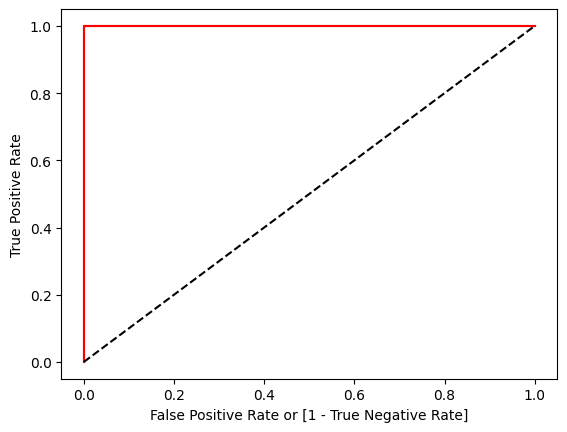

auc accuracy: 1.0


In [78]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, _ = metrics.roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr,color='red')
auc=accuracy_score(y_test,dt_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

### **svm**

In [79]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')

In [80]:
svm.fit(x_train,y_train)

SVC()

In [81]:
svm_pred = svm.predict ( x_test )

In [82]:
print(accuracy_score(y_test,svm_pred))

print(confusion_matrix(y_test,svm_pred))

print(classification_report(y_test,svm_pred))

1.0
[[12  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



# gridsearch

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {
    'C': [1,2,3,4,5],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly']
    }

In [85]:
gs = GridSearchCV( svm, params )

In [86]:
gs.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']})

In [87]:
gs.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [88]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C = 1, gamma = 0.1 )

In [89]:
svm.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [90]:
svm_pred = svm.predict ( x_test )

In [91]:
print(accuracy_score(y_test,svm_pred))

print(confusion_matrix(y_test,svm_pred))

print(classification_report(y_test,svm_pred))

1.0
[[12  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



### **Naive bayes**

In [92]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()


In [93]:
nb.fit(x_train,y_train)

BernoulliNB()

In [94]:
nb_pred = nb.predict ( x_test )

In [95]:
print(accuracy_score(y_test,nb_pred))

print(confusion_matrix(y_test,nb_pred))

print(classification_report(y_test,nb_pred))

1.0
[[12  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



### **Random forest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)


In [97]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [98]:
rf_pred = rf.predict ( x_test )

In [99]:
print(accuracy_score(y_test,rf_pred))

print(confusion_matrix(y_test,rf_pred))

print(classification_report(y_test,rf_pred))

1.0
[[12  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



# Visualization of all model accuracy

In [100]:
print(f"Accuracy (Logistic regression model): {accuracy_score(y_test, lr_pred):.2f}")
print(f"Accuracy (KNN model): {accuracy_score(y_test, knn_pred):.2f}")
print(f"Accuracy (Decision Tree model): {accuracy_score(y_test, dt_pred):.2f}")
print(f"Accuracy (Support Vector Machines model): {accuracy_score(y_test, svm_pred):.2f}")
print(f"Accuracy (Naive Bayes model): {accuracy_score(y_test, nb_pred):.2f}")
print(f"Accuracy (Random Forest Classifier model): {accuracy_score(y_test, rf_pred):.2f}")


Accuracy (Logistic regression model): 1.00
Accuracy (KNN model): 0.97
Accuracy (Decision Tree model): 1.00
Accuracy (Support Vector Machines model): 1.00
Accuracy (Naive Bayes model): 1.00
Accuracy (Random Forest Classifier model): 1.00


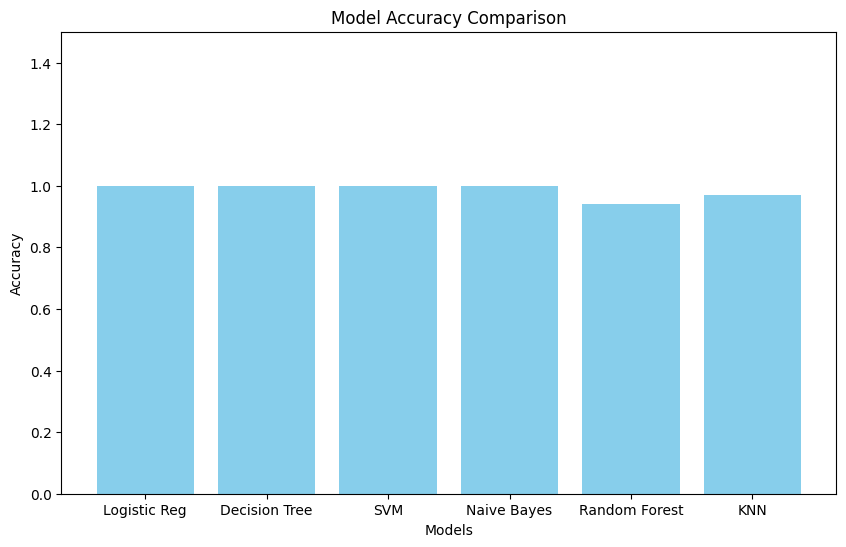

In [101]:
accuracy_scores = {
    'Logistic Reg': 1,
    'Decision Tree': 1,
    'SVM': 1,
    'Naive Bayes': 1,
    'Random Forest': 0.94,
    'KNN': 0.97
}

# bar chart
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.5)
plt.xticks(rotation=0)
plt.show()


### **MODEL DEPLOYMENT**

### **Input_data**

In [102]:
input_data = ( 	0.5, 1.0, 0.0, 0.0, 0.0, 0.5 )

input_data_as_numpy_array = np.asarray(input_data)

input_data_as_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = svm.predict( input_data_as_reshaped )

print(prediction)

# 0--bankruptcy
# 1--non-bankruptcy

if ( prediction[0] == 0):
  print(" bankruptcy ")

else:
    print(" non-bankruptcy ")

[0]
 bankruptcy 


**Saving the trained moel**

In [103]:
import pickle

In [104]:
filename = 'trained_model_new1.save'
pickle.dump( svm, open(filename, 'wb'))

### **#Loading the saved model**

In [105]:
load_model = pickle.load(open('trained_model_new1.save', 'rb'))

In [106]:
input_data =( 1.0, 0.0, 0.5, 0.5, 1.0, 1.0 )

input_data_as_numpy_array = np.asarray(input_data)

input_data_as_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = load_model.predict( input_data_as_reshaped )

print(prediction)

# 0--bankruptcy
# 1--non-bankruptcy

if ( prediction[0] == 0):
  print(" bankruptcy ")

else:
    print(" non-bankruptcy ")

[1]
 non-bankruptcy 
